In [1]:
%pylab
from itkwidgets import view
import glob
import SimpleITK as sitk
import pandas as pd
import matplotlib.patches as patches
%matplotlib inline

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
dirname = '/ocean/projects/asc170022p/rohit33/Liver/'

In [14]:
def load(file):
    return sitk.GetArrayFromImage(sitk.ReadImage(file))

In [5]:
dirlist = sorted(glob.glob(dirname + "*"))

In [140]:
di = dirlist[1]

In [141]:
# glob.glob(di + "/PATIENT_DICOM/*")

In [142]:
glob.glob(di + "/MASKS_DICOM/*")

['/ocean/projects/asc170022p/rohit33/Liver/3Dircadb1.10/MASKS_DICOM/portalvein1',
 '/ocean/projects/asc170022p/rohit33/Liver/3Dircadb1.10/MASKS_DICOM/bone',
 '/ocean/projects/asc170022p/rohit33/Liver/3Dircadb1.10/MASKS_DICOM/skin',
 '/ocean/projects/asc170022p/rohit33/Liver/3Dircadb1.10/MASKS_DICOM/venacava',
 '/ocean/projects/asc170022p/rohit33/Liver/3Dircadb1.10/MASKS_DICOM/liver',
 '/ocean/projects/asc170022p/rohit33/Liver/3Dircadb1.10/MASKS_DICOM/livertumor']

In [143]:
glob.glob("/ocean/projects/asc170022p/rohit33/Liver/*/MASKS_DICOM/venoussystem")

['/ocean/projects/asc170022p/rohit33/Liver/3Dircadb1.8/MASKS_DICOM/venoussystem',
 '/ocean/projects/asc170022p/rohit33/Liver/3Dircadb1.19/MASKS_DICOM/venoussystem',
 '/ocean/projects/asc170022p/rohit33/Liver/3Dircadb1.6/MASKS_DICOM/venoussystem',
 '/ocean/projects/asc170022p/rohit33/Liver/3Dircadb1.7/MASKS_DICOM/venoussystem',
 '/ocean/projects/asc170022p/rohit33/Liver/3Dircadb1.17/MASKS_DICOM/venoussystem',
 '/ocean/projects/asc170022p/rohit33/Liver/3Dircadb1.9/MASKS_DICOM/venoussystem',
 '/ocean/projects/asc170022p/rohit33/Liver/3Dircadb1.1/MASKS_DICOM/venoussystem',
 '/ocean/projects/asc170022p/rohit33/Liver/3Dircadb1.16/MASKS_DICOM/venoussystem',
 '/ocean/projects/asc170022p/rohit33/Liver/3Dircadb1.15/MASKS_DICOM/venoussystem',
 '/ocean/projects/asc170022p/rohit33/Liver/3Dircadb1.4/MASKS_DICOM/venoussystem',
 '/ocean/projects/asc170022p/rohit33/Liver/3Dircadb1.5/MASKS_DICOM/venoussystem',
 '/ocean/projects/asc170022p/rohit33/Liver/3Dircadb1.14/MASKS_DICOM/venoussystem']

In [188]:
idx = 100
img = load("/ocean/projects/asc170022p/rohit33/Liver/3Dircadb1.5/PATIENT_DICOM/image_{}".format(idx))
mask = load("/ocean/projects/asc170022p/rohit33/Liver/3Dircadb1.5/MASKS_DICOM/liver/image_{}".format(idx))
ves = load("/ocean/projects/asc170022p/rohit33/Liver/3Dircadb1.5/MASKS_DICOM/venoussystem/image_{}".format(idx))

In [189]:
img = img*1.0
print(img.min(), img.max())
img = (img - img.min())/(img.max() - img.min())

-1024.0 1023.0


In [190]:
plt.figure(figsize=(12, 12))
view(img[0]*mask[0])
# plt.imshow(img[0], 'gray')
# plt.imshow(mask[0], alpha=0.1)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD2; pro…

<Figure size 864x864 with 0 Axes>

In [191]:
plt.figure(figsize=(12, 12))
# plt.imshow(ves[0], 'gray')
view(ves[0])

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageUC2; pr…

<Figure size 864x864 with 0 Axes>

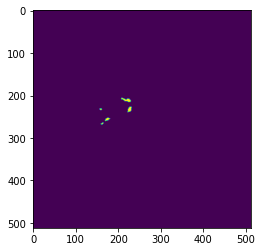

In [83]:
path = '/ocean/projects/asc170022p/rohit33/Liver/3Dircadb1.2/MASKS_DICOM/portalvein/image_120'
img = load(path)
plt.imshow(img[0])

In [192]:
path = '/ocean/projects/asc170022p/rohit33/Liver/3Dircadb1.5/venoussystem.nii.gz'
img = sitk.GetArrayFromImage(sitk.ReadImage(path))

In [193]:
view(img)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

In [175]:
img.min()

0.0

# Get image sizes for patchification

In [5]:
images = sorted(glob.glob("/ocean/projects/asc170022p/rohit33/Liver/*/venoussystem.nii.gz"))

In [11]:
dims = []
patchIds = []
numPatches = []

for img in images:
    img = sitk.GetArrayFromImage(sitk.ReadImage(img))
    shape = img.shape
    numP = [int(ceil((x - 64)/48.)) + 1 for x in shape]
    dims.append(shape)
    patchIds.append(numP)
    numPatches.append(np.prod(numP))

In [12]:
dims

[(98, 272, 342),
 (104, 204, 325),
 (115, 198, 252),
 (113, 310, 287),
 (113, 280, 273),
 (41, 212, 267),
 (67, 248, 244),
 (119, 267, 268),
 (96, 271, 256),
 (98, 230, 341),
 (116, 252, 433),
 (89, 224, 242)]

In [13]:
patchIds

[[2, 6, 7],
 [2, 4, 7],
 [3, 4, 5],
 [3, 7, 6],
 [3, 6, 6],
 [1, 5, 6],
 [2, 5, 5],
 [3, 6, 6],
 [2, 6, 5],
 [2, 5, 7],
 [3, 5, 9],
 [2, 5, 5]]

In [14]:
numPatches

[84, 56, 60, 126, 108, 30, 50, 108, 60, 70, 135, 50]

In [15]:
sum(numPatches)

937

# Test data loader

In [16]:
from data_loader.ircaddataset import *

In [17]:
ds = IrcadDataset('/ocean/projects/asc170022p/rohit33/Liver/')

In [22]:
view(ds[0]['image'][0])

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageF3; pro…

In [7]:
frangi = np.load('/ocean/projects/asc170022p/rohit33/Ircadoutput/frangi_0.npy')

In [19]:
view((frangi > 14e-5).astype(float))

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

In [10]:
frangi.min()

0.0